##Importing Libraries

In [2]:
import pandas as pd
from numpy import asarray
from sklearn.datasets import make_classification
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
import matplotlib.pyplot as plt
# df = pd.read_csv(r"C:\Users\hp\Downloads\DryBeanDataset\DryBeanDataset\Dry_Bean_Dataset.csv")


## Loading the dataset

In [3]:
# If you've got the file in local drive ignore this step
! gdown --id 1JxNUhdP4fby1QlTdMnUbSz9iZjX4bPTs

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JxNUhdP4fby1QlTdMnUbSz9iZjX4bPTs
To: /content/Dry_Bean.csv
100% 2.48M/2.48M [00:00<00:00, 181MB/s]


In [4]:
# Reading the data in csv
df = pd.read_csv('Dry_Bean.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Data information about columns and rows
# Displaying infromation for clear underatsanding
df.info()
print(df.columns)
print(df.index)
print(df.values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
# Data cleaning
print(df.isnull().sum())
df = df.dropna(axis=0)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [7]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [8]:
# tell about the class
type(df['Class'])


pandas.core.series.Series

In [9]:
# Tell the information about dataset classes
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


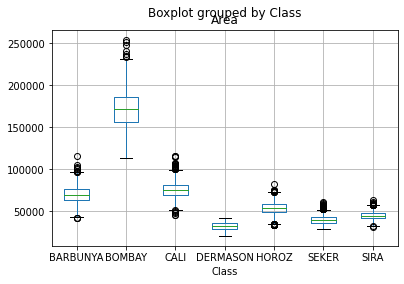

In [10]:
boxplot = df.boxplot(column=['Area'], by='Class')
# Tried the box plot. learned from tableau

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


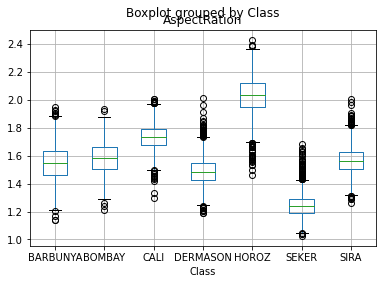

In [11]:
boxplot = df.boxplot(column=['AspectRation'], by='Class')

## Data Exploration

In [12]:
# importing seaborn library
import seaborn as sns

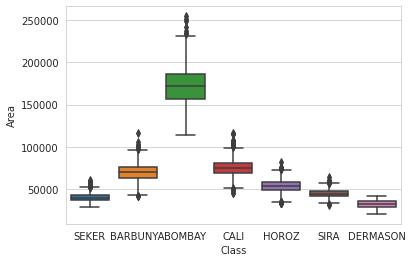

In [13]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'Class', y = 'Area', data = df)
# Adding features to it as well understanding it

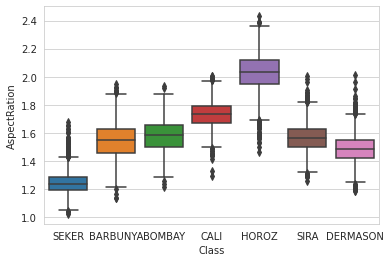

In [14]:
sns.boxplot(x = 'Class', y = 'AspectRation', data = df)

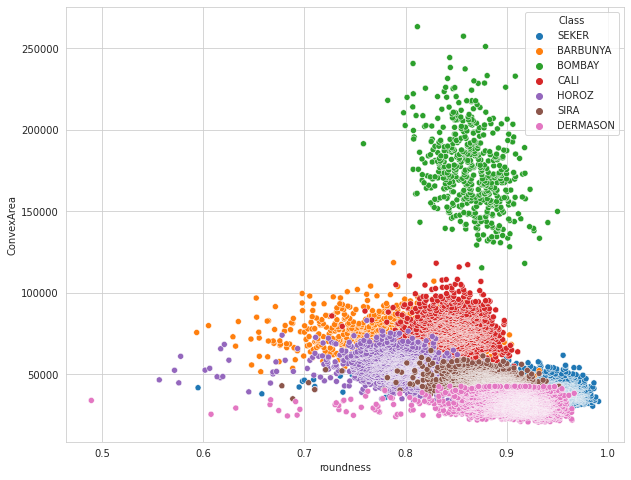

In [15]:
# Trying various methods to identify the correctness
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.roundness , y=df['ConvexArea'], hue=df.Class )
plt.show()
# tried scatter plot representation to check the code

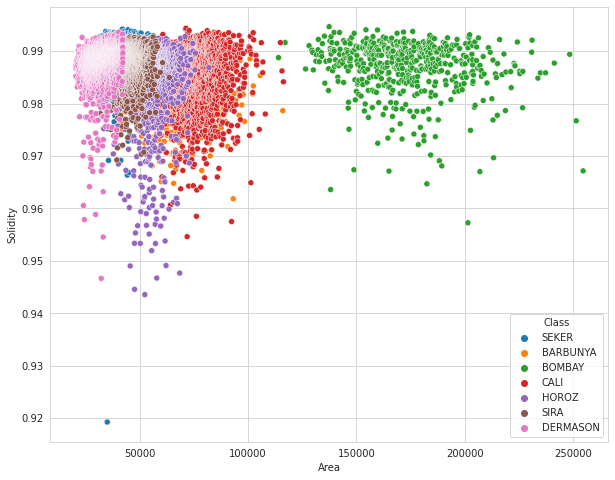

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.Area , y=df['Solidity'], hue=df.Class )
plt.show()

## Altair Library

Altair is a declarative statistical visualization library for Python, based on Vega and Vega-Lite.

Altair offers a powerful and concise visualization grammar that enables you to build a wide range of statistical visualizations quickly. Here is an example of using the Altair API to quickly visualize a dataset with an interactive scatter plot:

Source: https://altair-viz.github.io/getting_started/overview.html
<br>
https://altair-viz.github.io/gallery/boxplot.html


In [17]:
# importing altair library
import altair as alt

In [18]:
## dropping an unused column
df2 = df.drop(['Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','EquivDiameter','Extent','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'],axis =1)

Count Unique Values

In [19]:
# By using drop_duplicates()
count = df2.Class.drop_duplicates().size
print("Unique values count : "+ str(count))

Unique values count : 7


In [20]:
print(df2.Class.value_counts())

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


Looking ar the data we need to get equal number of rows for all categories, therefore chossing the respective categories 522 rows.

In [21]:
df3 = df2.groupby("Class").head(522)

In [22]:
print(df3[["Class"]].value_counts())

Class   
BARBUNYA    522
BOMBAY      522
CALI        522
DERMASON    522
HOROZ       522
SEKER       522
SIRA        522
dtype: int64


In [23]:
df3.columns

Index(['Area', 'AspectRation', 'ConvexArea', 'Solidity', 'roundness', 'Class'], dtype='object')

https://altair-viz.github.io/user_guide/encoding.html

In [25]:
alt.Chart(df3).mark_point().encode(
    x='Area:Q',
    y='Solidity:Q',
    color='Origin:O',
    shape='Origin:N'
)

alt.Chart(...)

😞 The data representation is not good ! The reason being data is not normalized as we limited data to certain number of rows only ! Therefore we need to use the technique of ***NORMALIZATION***.

https://www.geeksforgeeks.org/data-normalization-with-pandas/
<br>
https://www.datacamp.com/tutorial/altair-in-python
<BR>
https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475

In [26]:
# Normalizing data
# copy the data
df_min_max_scaled = df3.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    if column == 'Class':
        continue
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
# print(df_min_max_scaled)

In [27]:
alt.Chart(df_min_max_scaled).mark_point().encode(
    x='Area:Q',
    y='Solidity:Q',
    color='Class:N',
    shape='Class:N',
    tooltip = [alt.Tooltip('Class'),
               alt.Tooltip('Solidity'),
               alt.Tooltip('Area')
              ]
).interactive()
# Represented in a format as that of our prototype. 
# As stated in class perform one of the prototype

alt.Chart(...)

In [28]:
alt.Chart(df_min_max_scaled).mark_point().encode(
    x='Area:Q',
    y='Solidity:Q',
    color='Class:N',
    shape='Origin:N',
    tooltip = [alt.Tooltip('Class'),
               alt.Tooltip('Solidity'),
               alt.Tooltip('Area')
              ]
).interactive()
# Perfomred the 

alt.Chart(...)

                  Area  AspectRation  ConvexArea  Solidity  roundness
Area          1.000000      0.136519    0.999959 -0.050597  -0.189505
AspectRation  0.136519      1.000000    0.137894 -0.257164  -0.745264
ConvexArea    0.999959      0.137894    1.000000 -0.058001  -0.193057
Solidity     -0.050597     -0.257164   -0.058001  1.000000   0.617543
roundness    -0.189505     -0.745264   -0.193057  0.617543   1.000000


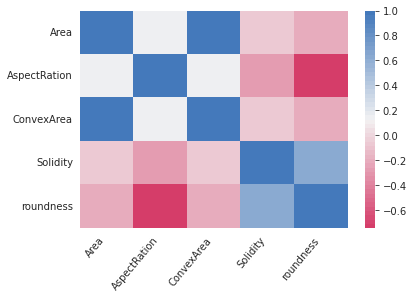

In [29]:
#  we are finding a corelation between two attributes
# through a co-relation fxn
print(df_min_max_scaled.corr())
correlationMatrix=df_min_max_scaled.corr(method='pearson')
ax = sns.heatmap(
  correlationMatrix
#   ,  min=-1, vmax=1, center=0,
  ,cmap=sns.diverging_palette(0, 250, n=50)
#   ,  square=True
)

ax.set_xticklabels (
    ax.get_xticklabels (),
    rotation=50,
    horizontalalignment='right'
); 
# Through the matrix we can find thew inter-relation of the data set but as per our problem what 
# attributes we require are represented in a better way through graph.